In [1]:
#Data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

#Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy import stats

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

sns.set()

In [2]:
# df1 = pd.read_csv('benign_w_class (1).csv')
# df2 = pd.read_csv('benign_w_class (2).csv')
# df3 = pd.read_csv('benign_w_class(3).csv')

# frames = [df1, df2, df3]
# dfFinal = pd.concat(frames)

# CSV_NAME = 'benign_complete.csv'

# #   This clears the CSV if it exists
# dfFinal.to_csv(CSV_NAME, mode='w', header=True)

In [3]:
#import dataframes
df1 = pd.read_csv('ransom_w_class.csv')
df2 = pd.read_csv('benign_complete.csv')

#drop extra first column
df1 = df1.drop(df1.columns[0], axis=1)
df2 = df2.drop(df2.columns[0], axis=1)
df2 = df2.drop(df2.columns[0], axis=1)

#remove the name column (string)
df1 = df1.drop('Name', axis=1)
df2 = df2.drop('Name', axis=1)

In [4]:
df2

,total smalis,receiver,service,activity,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,...,getExternalCacheDir,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto
0,1485,1,1,4,0,0,0,0,0,0,...,2,0,0,21,19,10,0,1,0,5
1,2519,4,2,79,0,0,1,1,0,0,...,0,0,0,30,11,76,3,0,0,15
2,156,1,0,3,0,0,0,0,0,0,...,0,0,0,1,3,0,0,0,464,0
3,365,0,0,5,0,0,0,0,0,0,...,0,0,0,19,30,2,0,0,0,5
4,67,0,0,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,4587,0,0,18,0,0,0,0,0,0,...,4,0,0,30,19,3,0,0,0,24
2442,6570,5,5,20,0,0,0,1,0,0,...,6,0,0,118,50,12,0,0,0,24
2443,2093,23,35,232,1,1,1,0,0,1,...,3,0,0,54,6,13,0,0,0,79
2444,15303,13,13,48,0,0,1,1,0,0,...,10,0,0,233,136,108,0,0,0,218


In [5]:
# Check for duplicated rows
# 159 duplicates
# 139 duplicates
bool_series = df1.duplicated(keep = 'last').sum()
bool_series2 = df2.duplicated().sum()
print("total rows:  Ransom:" + str(len(df1)) + " | Benign: " + str(len(df2)))
print("duplicated rows: Ransom:" + str(bool_series) + " | Benign: " + str(bool_series2))

total rows:  Ransom:1790 | Benign: 2446
duplicated rows: Ransom:1664 | Benign: 951


In [6]:
# Remove duplicated rows
df1 = df1.drop_duplicates(keep = 'last')
df2 = df2.drop_duplicates(keep = 'last')
bool_series = df1.duplicated().sum()
bool_series2 = df2.duplicated().sum()
print("duplicated rows:  ransom:" + str(bool_series) + " |  benign: " + str(bool_series2))

duplicated rows:  ransom:0 |  benign: 0


In [7]:
print("total rows:  Ransom:" + str(len(df1)) + " | Benign: " + str(len(df2)))

total rows:  Ransom:126 | Benign: 1495


In [8]:
#label the dataframes
df1['label'] = 'Ransomware'
df2['label'] = 'Benign'

#shrink benign
df2 = df2.sample(frac=1)
df2 = df2.iloc[0:150]

#join the dataframes into 1 dataframe (df3)
frames = [df1, df2]
df3 = pd.concat(frames)

#shuffle!
df3 = df3.sample(frac=1)
df1 = df1.sample(frac=1)
df2 = df2.sample(frac=1)

C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df3

,total smalis,receiver,service,activity,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,...,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto,label
360,20,3,1,3,1,1,1,1,1,1,...,0,0,0,12,4,0,0,0,2,Ransomware
1031,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ransomware
1956,18257,18,21,36,0,0,0,0,0,0,...,0,0,95,78,84,0,0,0,152,Benign
1709,335,0,0,1,0,0,0,0,0,0,...,0,0,31,4,5,0,0,0,0,Ransomware
473,1965,3,14,22,1,1,1,1,1,1,...,0,0,19,3,3,3,0,0,178,Ransomware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2693,2,2,1,0,0,0,0,0,0,...,0,0,22,5,1,0,0,0,10843,Ransomware
1720,40,2,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,15,Ransomware
1781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ransomware
179,248,2,2,2,1,1,1,1,1,1,...,0,0,0,2,9,2,1,0,0,Ransomware


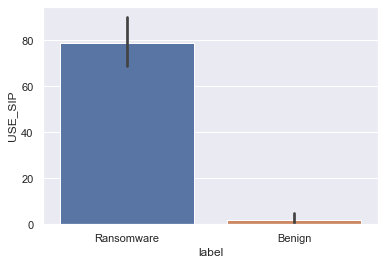

In [10]:
#from numpy import count_nonzero
#estimator=count_nonzero if you want counts, not avg
from numpy import count_nonzero

sns.barplot(y=df3['USE_SIP'], x = df3['label'] , estimator = count_nonzero)
plt.show()

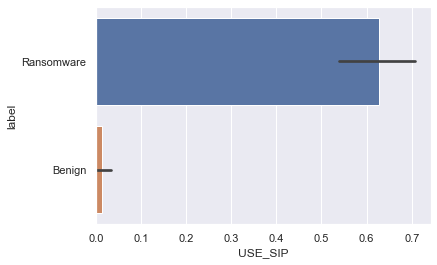

In [11]:
sns.barplot(x = df3['USE_SIP'], y = df3['label'])
plt.show()

In [12]:
#Visualize data
#df2.describe()
df3.describe()

,total smalis,receiver,service,activity,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,...,getExternalCacheDir,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,4508.586957,5.148551,7.253623,33.612319,0.307971,0.307971,0.456522,0.365942,0.300725,0.431159,...,2.670290,0.007246,0.010870,44.996377,33.239130,14.576087,0.362319,0.025362,7.010870,93.123188
std,7313.893540,11.213776,14.812065,251.777373,0.462493,0.462493,0.499011,0.482568,0.459406,0.496138,...,4.161729,0.120386,0.103877,71.326981,58.016305,38.597946,3.093552,0.157509,61.612424,667.376922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,457.000000,2.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,4.000000,0.000000,0.000000,0.000000,12.000000
75%,7032.250000,5.000000,7.250000,13.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,0.000000,0.000000,63.250000,44.250000,13.000000,0.000000,0.000000,0.000000,69.000000
max,51325.000000,148.000000,150.000000,4152.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,24.000000,2.000000,1.000000,413.000000,473.000000,512.000000,50.000000,1.000000,860.000000,10843.000000


In [13]:
# Define Validation method
# Train and validation set split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# change label to be a category
#df3["label"] = df3["label"].astype('category')

array = df3.values

#All of the non-label columns
X = array[:, 0:-1]

#label column
y = array[:, -1]

#USING CHI2 (current (X_new))
z = SelectKBest(chi2, k=25)
X_new = z.fit_transform(X, y)
X_new.shape

#Obtain the train/validation datasets on a 80/20 split
#TODO same w/ tenfold cross val
# compare results
X_train, X_validation, Y_train, Y_validation = train_test_split(X_new, y, test_size=0.30, random_state=12)

In [14]:
cols = z.get_support(indices=True)
features_df_new = df3.iloc[:,cols]
list(features_df_new.columns)

['total smalis',
 'receiver',
 'service',
 'activity',
 'KILL_BACKGROUND_PROCESSES',
 'SEND_SMS',
 'RECEIVE_SMS',
 'DEVICE_ADMIN_ENABLED',
 'REBOOT',
 '.method public',
 '.method private',
 'setReadable',
 'setWritable',
 'Cipher',
 'execSQL',
 'SQLiteDatabase',
 'openConnection',
 'getFilesDir',
 'getCacheDir',
 'getExternalFilesDir',
 'getExternalCacheDir',
 'FileInputStream',
 'getSharedPreferences',
 'telephony',
 'wallpaper']

In [15]:
from sklearn.ensemble import VotingClassifier

#Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=12000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto', max_iter=10000)))
models.append(('RF', RandomForestClassifier()))
models.append(('CNN', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 10000)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.953947 (0.052832)
LDA: 0.891579 (0.076014)
KNN: 0.886579 (0.049728)
CART: 0.948421 (0.051085)
SVM: 0.799211 (0.066168)
RF: 0.963947 (0.040153)
CNN: 0.880263 (0.097569)


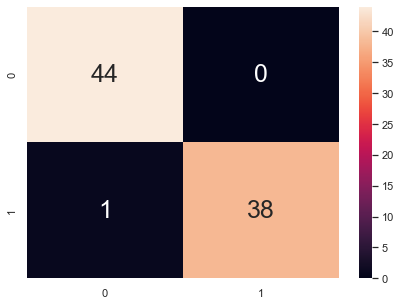

0.9879518072289156
[[44  0]
 [ 1 38]]
              precision    recall  f1-score   support

      Benign     0.9778    1.0000    0.9888        44
  Ransomware     1.0000    0.9744    0.9870        39

    accuracy                         0.9880        83
   macro avg     0.9889    0.9872    0.9879        83
weighted avg     0.9882    0.9880    0.9879        83



In [16]:
from sklearn.metrics import plot_confusion_matrix

# Make predictions on validation dataset using one model
#model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 10000)
model = RandomForestClassifier(n_estimators=35, max_depth = 3, random_state=1212)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

fig, ax = plt.subplots(figsize=(7, 5))
cfm = confusion_matrix(Y_validation, predictions)
sns.heatmap(cfm, annot=True, annot_kws={"size": 25}, fmt='g', ax=ax)
plt.show()

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, digits=4))

In [17]:
# Making an ensamble out of multiple classifiers
clf1 = LogisticRegression(solver='liblinear', multi_class='ovr', dual=False, max_iter=12000)
clf2 = RandomForestClassifier(n_estimators=50, random_state=12)
clf3 = DecisionTreeClassifier()
clf4 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 100000)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3), ('cnn', clf4)],
                        voting='hard')

# Make predictions on validation dataset
model = eclf
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("Ensamble accuracy: " + str(accuracy_score(Y_validation, predictions)))
print("Matrix: ")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Ensamble accuracy: 0.9759036144578314
Matrix: 
[[44  0]
 [ 2 37]]
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        44
  Ransomware       1.00      0.95      0.97        39

    accuracy                           0.98        83
   macro avg       0.98      0.97      0.98        83
weighted avg       0.98      0.98      0.98        83



In [18]:
y[y == 'Benign'] = 0
y[y == 'Ransomware'] = 1
y = y.astype(int)

In [19]:
# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.5f (+/- %0.5f) [%s]" %
          (scores.mean(), scores.std(), label))

Accuracy: 0.96019 (+/- 0.02401) [Logistic Regression]
Accuracy: 0.97104 (+/- 0.01448) [Random Forest]
Accuracy: 0.96013 (+/- 0.01784) [Dec. Tree]
Accuracy: 0.92026 (+/- 0.02729) [CNN]
Accuracy: 0.96740 (+/- 0.02118) [Ensamble]


In [24]:
# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='f1', cv=5)
    print("F1: %0.5f [%s]" %
          (scores.mean(), label))

F1: 0.95632 [Logistic Regression]
F1: 0.96815 [Random Forest]
F1: 0.93576 [Dec. Tree]
F1: 0.91527 [CNN]
F1: 0.96325 [Ensamble]


In [22]:
# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='precision', cv=5)
    print("Precision: %0.5f [%s]" %
          (scores.mean(), label))

Precision: 0.95367 [Logistic Regression]
Precision: 0.97692 [Random Forest]
Precision: 0.93858 [Dec. Tree]
Precision: 0.89078 [CNN]
Precision: 0.97649 [Ensamble]


In [23]:
# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='recall', cv=5)
    print("Recall: %0.5f [%s]" %
          (scores.mean(), label))

Recall: 0.96031 [Logistic Regression]
Recall: 0.96062 [Random Forest]
Recall: 0.94492 [Dec. Tree]
Recall: 0.94492 [CNN]
Recall: 0.94462 [Ensamble]


In [26]:
from sklearn.model_selection import cross_validate
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
            'fn': cm[1, 0], 'tp': cm[1, 1]}
cv_results = cross_validate(eclf, X_new, y, cv=5,
                            scoring=confusion_matrix_scorer)

In [27]:
cv_results

{'fit_time': array([0.24722528, 0.34731698, 0.54649663, 0.32129312, 0.25423098]),
 'score_time': array([0.00400281, 0.00500417, 0.00400352, 0.00600386, 0.004004  ]),
 'test_tn': array([30, 29, 30, 29, 30]),
 'test_fp': array([0, 1, 0, 1, 0]),
 'test_fn': array([2, 0, 1, 3, 1]),
 'test_tp': array([24, 25, 24, 22, 24])}